In [1]:
import numpy as np

In [2]:
x = np.linspace(0,1,50)
f = lambda x,a,b: a*x + b*x**2
sigma = 0.5
e = np.random.normal(loc=0,scale=sigma,size=(len(x))) # careful of python std or var
a_true = 1.
b_true = 3.
y_obs = f(x,a_true,b_true) + e

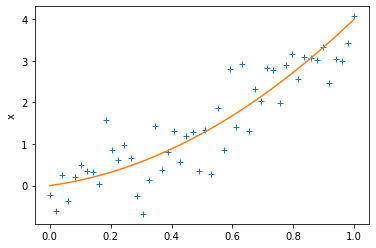

In [3]:
plt.plot(x,y_obs,'+')
plt.plot(x,f(x,a_true,b_true),'-')
plt.ylabel('y')
plt.ylabel('x')
plt.show()

In [20]:
def residual(a,b):
    return y_obs - f(x,a,b)

def likelihood(a,b):
    return np.exp(-1/(2*sigma**2)*(np.linalg.norm(residual(a,b),2)**2))

In [21]:
pmin = -1
pmax = 4
a_grid = np.linspace(pmin,pmax,100)
b_grid = np.linspace(pmin,pmax,100)

In [22]:
likes = np.zeros((len(a_grid),len(b_grid)))
for i, ai in enumerate(a_grid):
    for j, bj in enumerate(b_grid):
        likes[i,j] = likelihood(ai,bj)

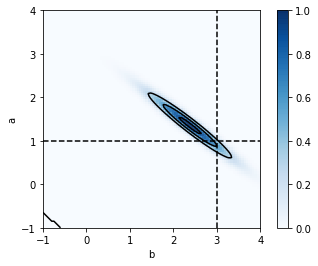

In [23]:
contours = plt.contour(a_grid, b_grid, likes, 3, colors='black')
#plt.clabel(contours, inline=True)

plt.imshow(likes/np.max(likes), extent=[pmin, pmax, pmin, pmax], origin='lower',
           cmap='Blues', alpha=0.9)
plt.colorbar();
plt.xlabel('b')
plt.ylabel('a')
plt.hlines(y=a_true,xmin=pmin,xmax=pmax,linestyles='--')
plt.vlines(x=b_true,ymin=pmin,ymax=pmax,linestyles='--')
plt.savefig('./likelihood_joint.eps')
plt.show()

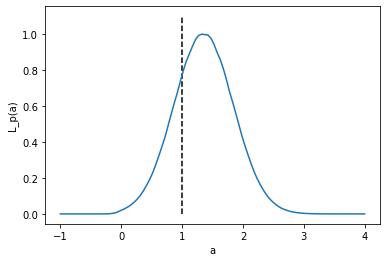

In [24]:
plt.plot(a_grid,np.max(likes,axis=1)/np.max(likes))
plt.xlabel('a')
plt.ylabel('L_p(a)')
plt.vlines(x=a_true,ymin=0,ymax=1.1,linestyles='--')
plt.savefig('./likelihood_a.pdf')
plt.show()

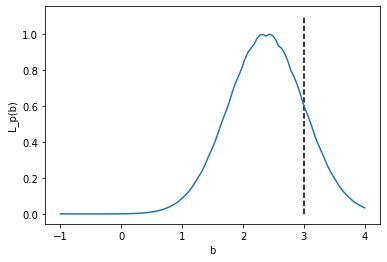

In [25]:
plt.plot(a_grid,np.max(likes,axis=0)/np.max(likes))
plt.xlabel('b')
plt.ylabel('L_p(b)')
plt.vlines(x=b_true,ymin=0,ymax=1.1,linestyles='--')
plt.savefig('./likelihood_b.pdf')
plt.show()

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))#, tight_layout=True)

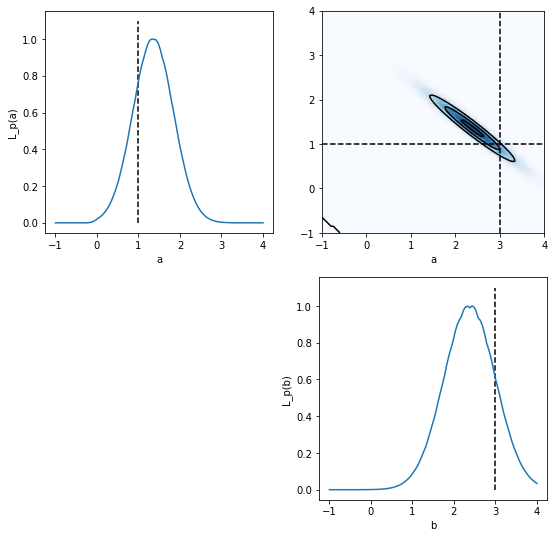

In [27]:

axs[0,0].plot(b_grid,np.max(likes,axis=1)/np.max(likes))
axs[0,0].set_xlabel('a')
axs[0,0].set_ylabel('L_p(a)')
axs[0,0].vlines(x=a_true,ymin=0,ymax=1.1,linestyles='--')

axs[0,1].contour(a_grid, b_grid, likes, 3, colors='black')

im = axs[0,1].imshow(likes/np.max(likes), extent=[pmin, pmax, pmin, pmax], origin='lower',
           cmap='Blues', alpha=0.9)
axs[0,1].set_xlabel('b')
axs[0,1].set_xlabel('a')

axs[0,1].hlines(y=a_true,xmin=pmin,xmax=pmax,linestyles='--')
axs[0,1].vlines(x=b_true,ymin=pmin,ymax=pmax,linestyles='--')

axs[1,1].plot(b_grid,np.max(likes,axis=0)/np.max(likes))
axs[1,1].set_xlabel('b')
axs[1,1].set_ylabel('L_p(b)')
axs[1,1].vlines(x=b_true,ymin=0,ymax=1.1,linestyles='--')


axs[1,0].axis('off')

plt.savefig('./profiles_regression.pdf')
plt.show()